# Análises da Mega Sena

## Utilitários

In [25]:
def sort_dict_by_value_reverse(d):
    return dict(sorted(d.items(), key=lambda x: x[1], reverse=True))

def sort_dict_by_key(d):
    return dict(sorted(d.items(), key=lambda x: x[0]))

def iterate_each_item_row(data, func):
    for index, row in data.iterrows():
        for item in row:
            func(item)

def iterate_each_row(data, func):
    for index, row in data.iterrows():
        func(row)

def check_consecutive(l):
    return sorted(l) == list(range(min(l), max(l)+1))

def split_list(l, n):
    return [l[i:i + n] for i in range(0, len(l), n)]

def print_dict(d, headers):
    from tabulate import tabulate
    print(tabulate([[k, v] for k,v in d.items()], headers = headers))

def truncate(n, decimals=2):
    multiplier = 10 ** decimals
    return int(n * multiplier) / multiplier

# matplotlib configuration
import matplotlib.pyplot as plt
# plt.rcParams['figure.figsize'] = [12, 8]
# %matplotlib widget
# %matplotlib notebook
%matplotlib inline

def scatter_plot(x, y):
    plt.plot(x, y, 'o')
    plt.ylim(ymin=0)
    plt.rcParams['figure.dpi'] = 200
    plt.show()

## Carregamento dos dados

In [26]:
import pandas as pd

mega_data = pd.read_excel('./data/mega_sena_2439.xlsx', sheet_name='mega_sena_www.asloterias.com.br', usecols='c:h', skiprows=6, nrows=2440)

## Números mais sorteados

-> Todos os números de 1 a 60 foram sorteados:
sim
-> números mais sorteados
  números    vezes
---------  -------
       53      279
       10      277
        5      268
       42      266
       37      264
        4      264
       33      263
       30      260
       27      260
       23      260
       54      258
       28      258
       34      257
       29      256
       41      255
       44      255
       35      255
       43      255
       11      254
       16      254
       17      253
       38      252
       51      252
       36      252
       24      252
       32      250
        2      249
       49      249
        6      248
       56      247
       13      247
        8      246
       52      244
       46      242
       18      240
       50      240
       58      238
       12      237
        1      235
       45      235
       20      235
       25      234
       40      233
        7      233
       19      232
       57      232
       39  

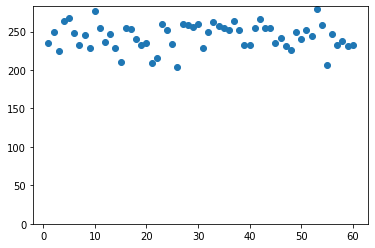

In [27]:
num_dict = {}
def most_freq_numbers(n):
    num_dict[n] = num_dict.setdefault(n, 0) + 1

iterate_each_item_row(mega_data, most_freq_numbers)

num_dict = sort_dict_by_value_reverse(num_dict)

print('-> Todos os números de 1 a 60 foram sorteados:')
num_dict_key = sort_dict_by_key(num_dict)
if list(num_dict_key.keys()) == list(range(1, 61)):
    print('sim')
else:
    print('não')

print('-> números mais sorteados')
print_dict(num_dict,  ['números', 'vezes'])

x = []
y = []
for k, v in num_dict.items():
    x.append(k)
    y.append(v)

scatter_plot(x, y)

## Números pares e ímpares

In [28]:
num_dict = {}
def most_freq_numbers(n):
    if n % 2 == 0:
        num_dict['par'] = num_dict.setdefault('par', 0) + 1
    else:
        num_dict['impar'] = num_dict.setdefault('impar', 0) + 1

iterate_each_item_row(mega_data, most_freq_numbers)

num_dict = sort_dict_by_value_reverse(num_dict)

par_per = num_dict['par']*100/(num_dict['par'] + num_dict['impar'])
impar_per = num_dict['impar']*100/(num_dict['par'] + num_dict['impar'])

num_dict['par'] = f"{num_dict['par']} - {truncate(par_per)}%"
num_dict['impar'] = f"{num_dict['impar']} - {truncate(impar_per)}%"

print('-> total de números pares em ímpares')
print_dict(num_dict,  ['tipo', 'total'])

-> total de números pares em ímpares
tipo    total
------  -------------
par     7360 - 50.29%
impar   7274 - 49.7%


## Sequencias consecutivas de 2 mais sorteadas

In [29]:
consecutive = 2
num_dict = {}

def most_freq_consecutive(row):
    row_sorted = sorted(row)
    row_split = split_list(row_sorted, consecutive)
    for s in row_split:
        if check_consecutive(s) and len(s) == consecutive:
            key = ' '.join(str(e) for e in s)
            num_dict[key] = num_dict.setdefault(key, 0) + 1

iterate_each_row(mega_data, most_freq_consecutive)

num_dict = sort_dict_by_value_reverse(num_dict)

print('-> sequencias consecutivas de 2 mais sorteadas')
print_dict(num_dict,  ['consecutivos', 'total'])

-> sequencias consecutivas de 2 mais sorteadas
consecutivos      total
--------------  -------
1 2                  23
57 58                22
58 59                21
2 3                  20
59 60                20
7 8                  20
51 52                19
8 9                  17
17 18                17
10 11                16
4 5                  16
56 57                16
5 6                  16
6 7                  15
48 49                15
12 13                15
15 16                14
38 39                14
53 54                14
54 55                13
23 24                13
3 4                  13
46 47                13
31 32                12
28 29                12
27 28                12
34 35                12
24 25                12
52 53                12
55 56                12
43 44                11
30 31                11
41 42                11
9 10                 11
37 38                11
11 12                11
47 48                11
36 37            

## Sequencias consecutivas de 3 mais sorteadas

In [30]:
consecutive = 3
num_dict = {}

def most_freq_consecutive(row):
    row_sorted = sorted(row)
    row_split = split_list(row_sorted, consecutive)
    for s in row_split:
        if check_consecutive(s) and len(s) == consecutive:
            key = ' '.join(str(e) for e in s)
            num_dict[key] = num_dict.setdefault(key, 0) + 1

iterate_each_row(mega_data, most_freq_consecutive)

num_dict = sort_dict_by_value_reverse(num_dict)

print('-> sequencias consecutivas de 3 mais sorteadas')
print_dict(num_dict,  ['consecutivos', 'total'])

-> sequencias consecutivas de 3 mais sorteadas
consecutivos      total
--------------  -------
57 58 59              4
56 57 58              3
6 7 8                 3
4 5 6                 2
31 32 33              2
10 11 12              2
58 59 60              2
17 18 19              2
32 33 34              1
26 27 28              1
41 42 43              1
8 9 10                1
53 54 55              1
37 38 39              1
40 41 42              1
45 46 47              1
20 21 22              1
1 2 3                 1
28 29 30              1
27 28 29              1
2 3 4                 1
36 37 38              1
49 50 51              1
35 36 37              1
52 53 54              1
12 13 14              1
33 34 35              1
5 6 7                 1
54 55 56              1


## Sequencias consecutivas de 4 mais sorteadas

In [31]:
consecutive = 4
num_dict = {}

def most_freq_consecutive(row):
    row_sorted = sorted(row)
    row_split = split_list(row_sorted, consecutive)
    for s in row_split:
        if check_consecutive(s) and len(s) == consecutive:
            key = ' '.join(str(e) for e in s)
            num_dict[key] = num_dict.setdefault(key, 0) + 1

iterate_each_row(mega_data, most_freq_consecutive)

num_dict = sort_dict_by_value_reverse(num_dict)

print('-> sequencias consecutivas de 4 mais sorteadas')
print_dict(num_dict,  ['consecutivos', 'total'])

-> sequencias consecutivas de 4 mais sorteadas
consecutivos    total
--------------  -------


## Grafico de dispersão dos números agrupado por pares

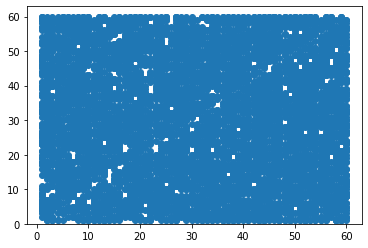

In [32]:
import matplotlib.pyplot as plt
%matplotlib inline

x = []
y = []

consecutive = 2

def most_freq_consecutive(row):
    row_split = split_list(row, consecutive)
    for s in row_split:
        x.append(s[0])
        y.append(s[1])

iterate_each_row(mega_data, most_freq_consecutive)

scatter_plot(x, y)

## Fontes
### Python/Jupyter
- https://www.techiedelight.com/increment-value-key-dictionary-python/
- https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value
- https://www.geeksforgeeks.org/python-check-if-list-contains-consecutive-numbers/
- https://www.simplilearn.com/tutorials/python-tutorial/list-to-string-in-python
- https://www.delftstack.com/howto/python/python-split-list-into-chunks/
- https://stackoverflow.com/questions/16476924/how-to-iterate-over-rows-in-a-dataframe-in-pandas
- https://stackoverflow.com/questions/46153647/keyerror-0-when-accessing-value-in-pandas-series
- https://stackoverflow.com/questions/16888888/how-to-read-a-xlsx-file-using-the-pandas-library-in-ipython
- https://jakevdp.github.io/PythonDataScienceHandbook/04.02-simple-scatter-plots.html
- https://towardsdatascience.com/render-interactive-plots-with-matplotlib-2cf0918d89c9
- https://realpython.com/python-rounding/
- https://towardsdatascience.com/python-string-interpolation-829e14e1fc75
- https://stackoverflow.com/questions/42235918/python-tabulate-dictionary-containing-two-values-per-key
- https://www.educba.com/python-print-table/

### Dados
- https://asloterias.com.br/download-todos-resultados-mega-sena